# Quickstart

In [2]:
from lightkurve import search_targetpixelfile

pixel_file = search_targetpixelfile("KIC 8462852", quarter=16).download()


/home/charlie/Documents/github/exoplanet-hunting-ml/.venv/lib64/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


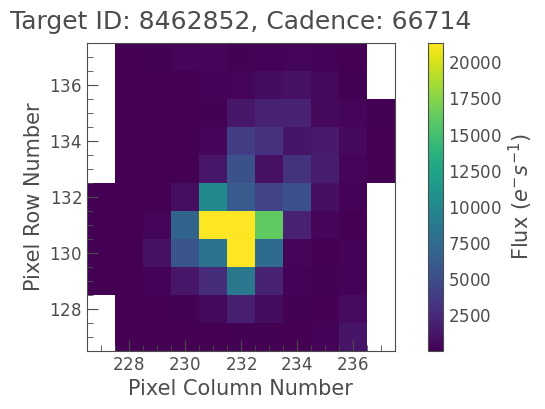

In [3]:
import matplotlib.pyplot as plt

pixel_file.plot(frame=1)
plt.show()

In [4]:
light_curve = pixel_file.to_lightcurve(aperture_mask='all')

time = [1472.11777934 1472.13821223 1472.15864492 ... 1557.91762194 1557.9380561
 1557.95849016]
flux = [258645.03 258660.05 258690.08 ... 258948.84 258884.66 258865.6 ] electron / s


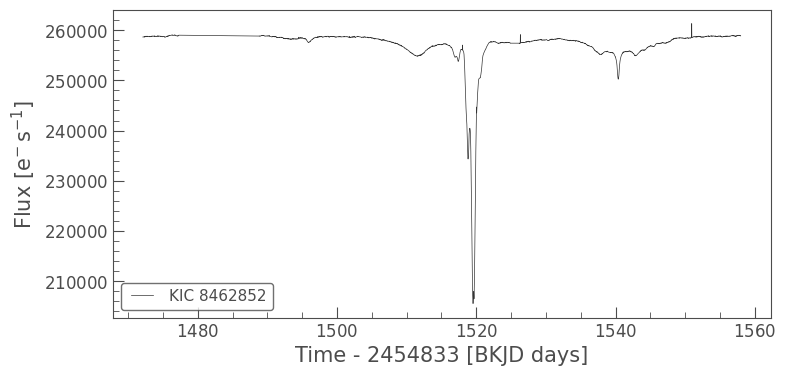

In [5]:
print(f"time = {light_curve.time}")
print(f"flux = {light_curve.flux}")

light_curve.plot()
plt.show()

# Lightcurves

In [6]:
tpf = search_targetpixelfile("KIC 6922244", author="Kepler", cadence="long", quarter=4)\
    .download()
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

In [7]:
lc.estimate_cdpp()

<Quantity 75.29876612 ppm>

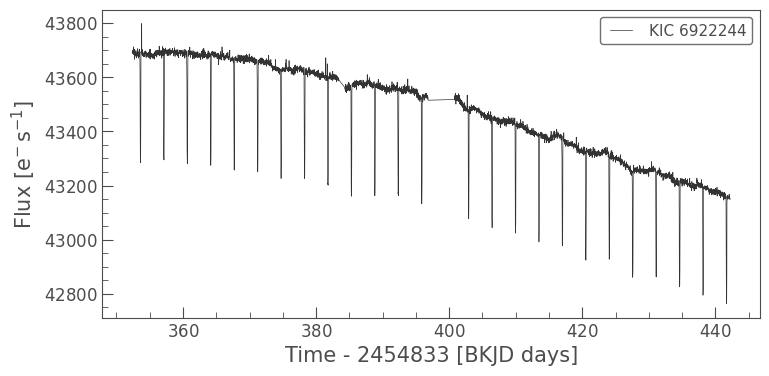

In [8]:
lc.plot()
plt.show()

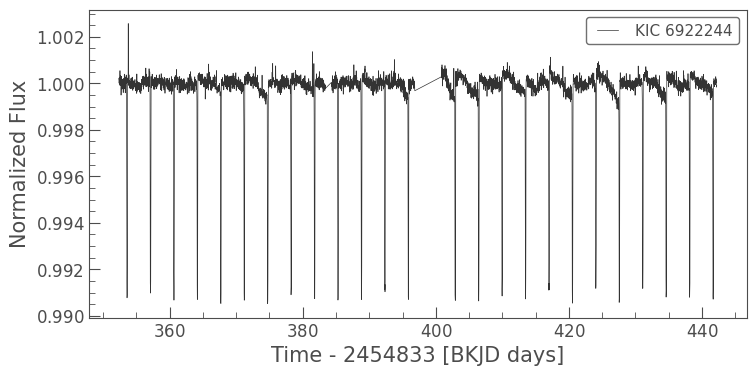

In [16]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot()
plt.show()

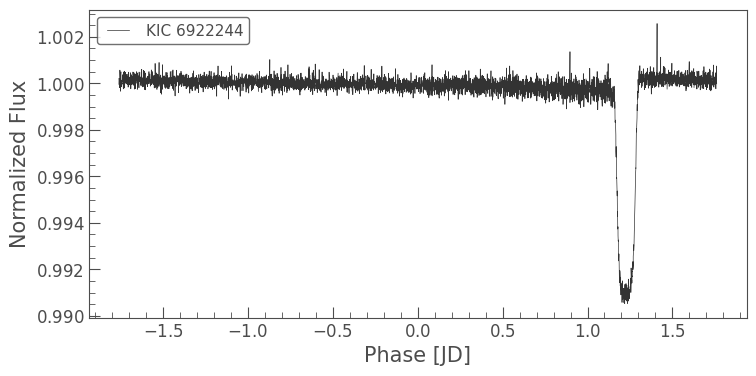

In [10]:
folded_lc = flat_lc.fold(period=3.5225)
folded_lc.plot()
plt.show()

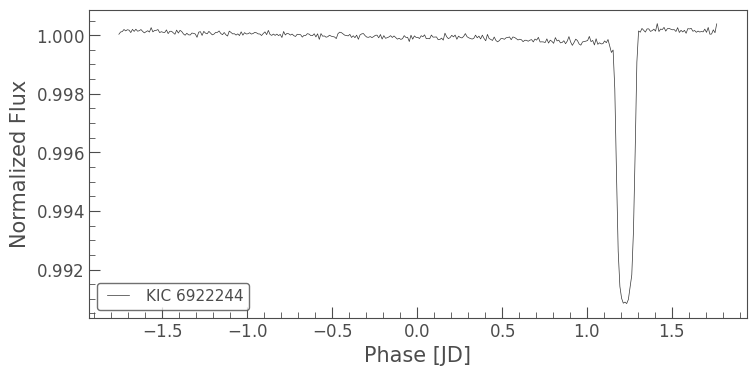

In [18]:
binned_lc = folded_lc.bin(time_bin_size=0.01)
binned_lc.plot()
plt.show()

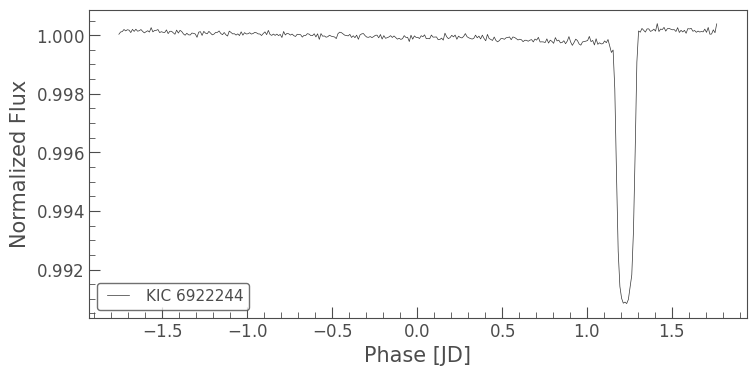

In [19]:
lc.remove_nans()\
    .flatten(window_length=401)\
    .fold(period=3.5225)\
    .bin(time_bin_size=0.01)\
    .plot()
plt.show()

# TPFs

In [20]:
%matplotlib inline
import lightkurve as lk

In [23]:
print(f"""
mission: {tpf.meta['MISSION']}
quarter: {tpf.meta['QUARTER']}
""")


mission: Kepler
quarter: 4



In [26]:
tpf.time.iso

array(['2009-12-19 21:01:54.467', '2009-12-19 21:31:19.895',
       '2009-12-19 22:30:10.752', ..., '2010-03-19 15:54:11.704',
       '2010-03-19 16:23:37.233', '2010-03-19 16:53:02.754'],
      shape=(4116,), dtype='<U23')

In [27]:
tpf.flux.shape

(4116, 5, 5)

In [28]:
type(tpf.flux)

astropy.units.quantity.Quantity

In [29]:
tpf.flux[0]

<Quantity [[          nan, 5.6079335e+00, 5.1491142e+01, 8.4241745e+01,
            3.0221334e+01],
           [4.4045620e+01, 7.6861229e+01, 1.1227759e+03, 3.2262029e+03,
            4.5486777e+02],
           [2.5911165e+01, 2.2907593e+02, 9.3626543e+03, 2.3606273e+04,
            1.2087750e+03],
           [4.0100830e+01, 8.8543927e+02, 1.7102118e+03, 2.6254871e+03,
            7.0796606e+02],
           [1.5719417e+02, 8.3713440e+02, 5.1021539e+02, 1.1501041e+03,
            1.8313370e+02]] electron / s>

<Axes: title={'center': 'Target ID: 6922244, Cadence: 11914'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

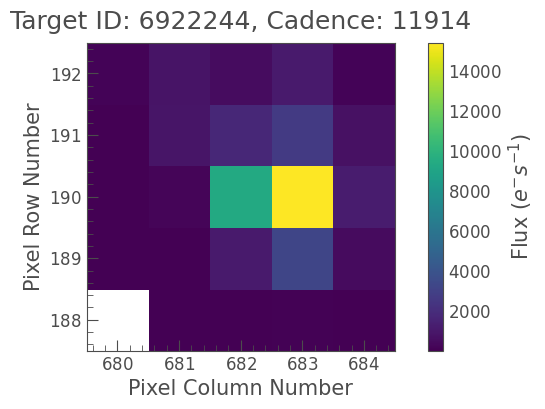

In [32]:
tpf.plot(frame=0)

<Axes: title={'center': 'Target ID: 6922244, Cadence: 11914'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

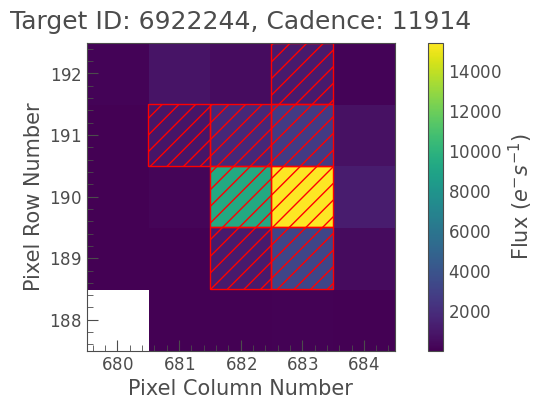

In [33]:
tpf.plot(aperture_mask=tpf.pipeline_mask)

In [34]:
tpf.get_header()[:10]

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-09-23'         / file creation date.                            
CREATOR = '917482 TargetPixelExporterPipelineModule' / pipeline job and program 

# Periodogram 

## Eclipsing Binary Star

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

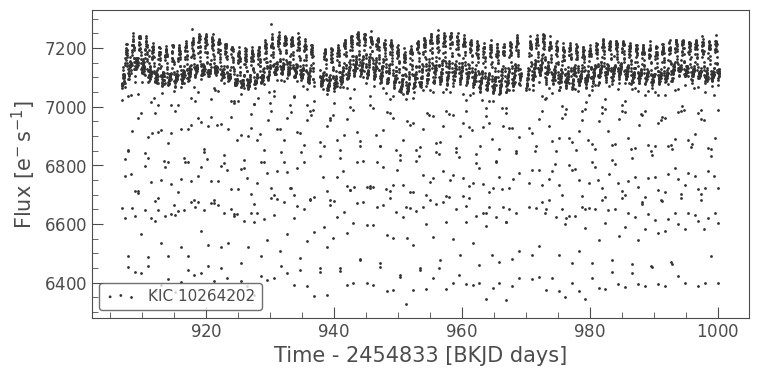

In [ ]:
from lightkurve import search_lightcurve

lc = search_lightcurve('KIC 10264202', author="Kepler", quarter=10, cadence="long")\
    .download()\
    .remove_nans()
lc.scatter()

<Axes: xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power [$\\mathrm{\\frac{e^{-}}{s}}$]'>

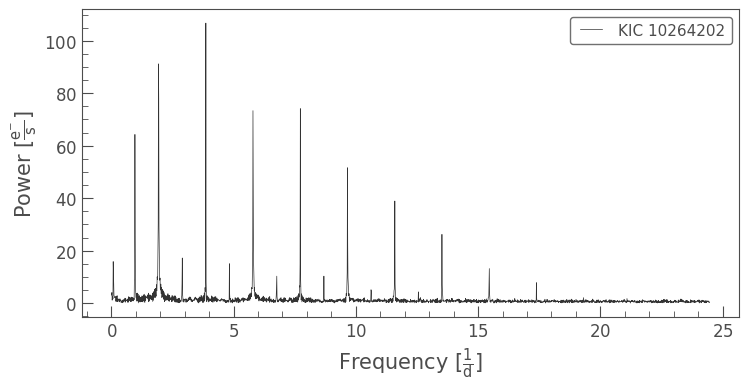

In [40]:
pg = lc.to_periodogram(oversample_factor=1)
pg.plot()

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='Power [$\\mathrm{\\frac{e^{-}}{s}}$]'>

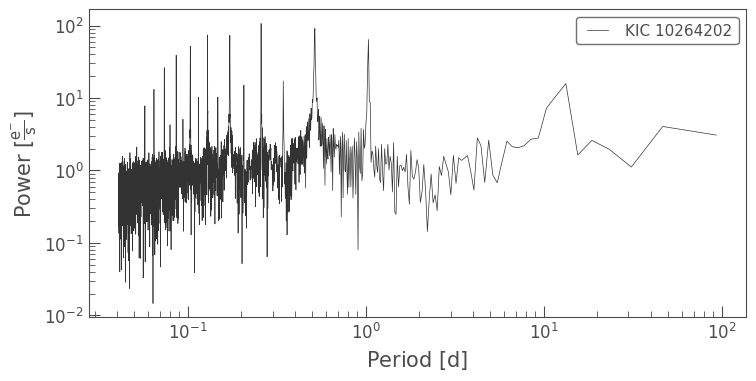

In [43]:
pg.plot(view='period', scale='log')

In [44]:
pg.period_at_max_power

<Quantity 0.25873116 d>

<Axes: xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

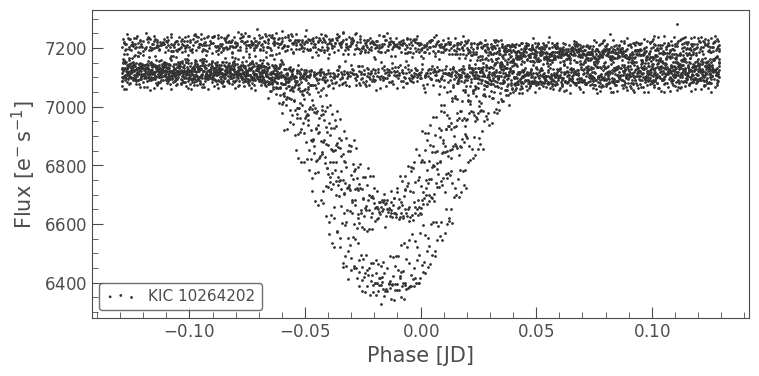

In [45]:
lc.fold(period=pg.period_at_max_power).scatter()

<Axes: xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

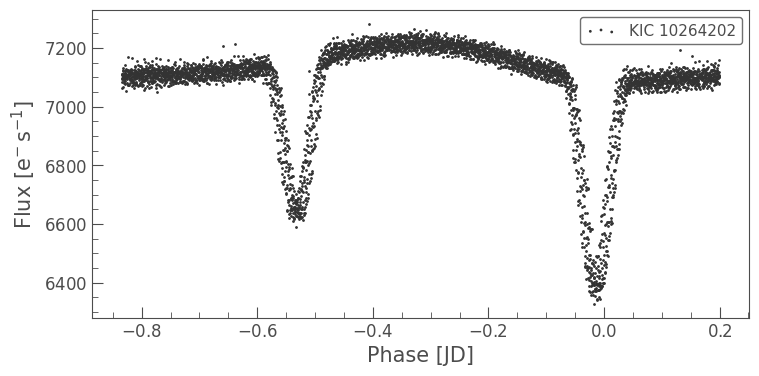

In [46]:
lc.fold(period=4*pg.period_at_max_power, wrap_phase=0.2).scatter()

1.0350971683913832 d


<Axes: xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

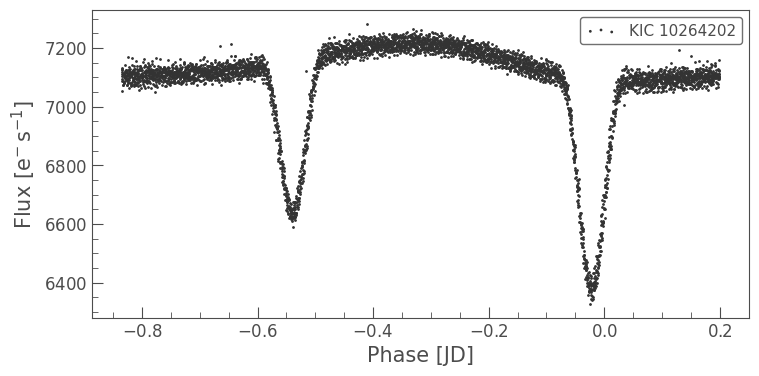

In [47]:
import astropy.units as u
pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
print(pg.period_at_max_power)
lc.fold(period=pg.period_at_max_power, wrap_phase=0.2).scatter()

# Searching & Downloading Kepler, K2, and TESS data

In [2]:
import os
import polars as pl

kic_filepath = "kepler-data/kic.txt"
kic = pl.scan_csv(kic_filepath, separator='|')
kic.collect()

kic_ra,kic_dec,kic_pmra,kic_pmdec,kic_umag,kic_gmag,kic_rmag,kic_imag,kic_zmag,kic_gredmag,kic_d51mag,kic_jmag,kic_hmag,kic_kmag,kic_kepmag,kic_kepler_id,kic_tmid,kic_scpid,kic_altid,kic_altsource,kic_galaxy,kic_blend,kic_variable,kic_teff,kic_logg,kic_feh,kic_ebminusv,kic_av,kic_radius,kic_cq,kic_pq,kic_aq,kic_catkey,kic_scpkey,kic_parallax,kic_glon,kic_glat,kic_pmtotal,kic_grcolor,kic_jkcolor,kic_gkcolor,kic_degree_ra,kic_fov_flag,kic_tm_designation
f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,str,str,i64,i64,i64,i64,f64,f64,f64,f64,f64,str,i64,i64,str,str,str,f64,f64,str,f64,f64,f64,f64,i64,str
12.769746,-0.50333,null,null,null,16.914,16.204,15.973,15.852,null,16.726,14.795,14.348,14.349,16.256001,1,928852236,928852236,null,null,0,0,0,4941,4.572,-0.45,0.054,0.167,0.809,"""SCP""",5,6,null,null,null,300.10217,62.339554,null,0.71,0.446,2.5650001,191.54619,0,"""12461108-0030119"""
12.748262,-0.49269,null,null,null,17.409,16.943001,16.843,16.739,null,17.211,15.938,15.46,15.393,17.013,2,928827196,928827196,null,null,0,0,0,5686,4.5359998,-0.236,0.055,0.169,0.915,"""SCP""",5,6,null,null,null,299.40778,62.334286,null,0.466,0.545,2.016,191.22392,0,"""12445374-0029336"""
12.749568,-0.45535,null,null,null,17.929001,16.541,15.393,14.821,null,17.618,13.483,12.89,12.617,16.153,3,928829411,928829411,null,null,0,0,0,3533,4.1209998,0.56,0.045,0.141,1.174,"""SCP""",5,6,null,null,null,299.44556,62.372635,null,1.388,0.866,5.3119998,191.24352,0,"""12445844-0027192"""
12.752082,-0.48896,null,null,null,17.125999,15.841,15.206,14.896,null,16.937,13.707,13.031,12.848,15.782,4,928829503,928829503,null,null,0,0,0,4007,4.5949998,0.167,0.038,0.118,0.605,"""SCP""",5,6,null,null,null,299.53058,62.341087,null,1.285,0.859,4.2779999,191.28123,0,"""12450749-0029202"""
12.75261,-0.4991,null,null,null,17.242001,16.305,15.961,15.782,null,17.073999,14.699,14.118,13.936,16.346001,5,928829520,928829520,null,null,0,0,0,4443,4.6630001,-0.9,0.049,0.152,0.639,"""SCP""",5,6,null,null,null,299.54877,62.331379,null,0.937,0.763,3.306,191.28915,0,"""12450939-0029567"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.855802,85.378189,null,null,15.408,15.187,14.683,14.519,14.417,15.501,14.957,13.611,13.252,13.192,14.72,13161025,788829047,788829047,null,null,0,0,0,6215,4.2649999,-0.295,0.117,0.362,1.308,"""SCP""",7,6,null,null,null,122.92996,22.506441,null,0.504,0.419,1.995,12.83703,0,"""00512088+8522414"""
0.856736,85.300926,null,null,14.695,13.638,12.988,12.697,12.516,13.956,13.421,11.439,10.9,10.776,12.98,13161026,788828873,788828873,null,null,0,0,0,6055,4.2490001,-0.3,0.087,0.27,1.325,"""SCP""",7,6,null,null,null,122.93117,22.42918,null,0.65,0.663,2.862,12.85104,0,"""00512425+8518033"""
0.8583833,85.335571,null,null,null,15.786,15.324,15.184,15.126,16.02,15.575,14.275,14.032,13.938,15.365,13161027,788828964,788828964,null,null,0,0,0,6305,4.1939998,-0.215,0.124,0.385,1.436,"""SCP""",6,6,null,null,null,122.93335,22.463821,null,0.462,0.337,1.848,12.87575,0,"""00513017+8520080"""


In [ ]:
kic.describe()

statistic,kic_ra,kic_dec,kic_pmra,kic_pmdec,kic_umag,kic_gmag,kic_rmag,kic_imag,kic_zmag,kic_gredmag,kic_d51mag,kic_jmag,kic_hmag,kic_kmag,kic_kepmag,kic_kepler_id,kic_tmid,kic_scpid,kic_altid,kic_altsource,kic_galaxy,kic_blend,kic_variable,kic_teff,kic_logg,kic_feh,kic_ebminusv,kic_av,kic_radius,kic_cq,kic_pq,kic_aq,kic_catkey,kic_scpkey,kic_parallax,kic_glon,kic_glat,kic_pmtotal,kic_grcolor,kic_jkcolor,kic_gkcolor,kic_degree_ra,kic_fov_flag,kic_tm_designation
str,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,str,str,str,f64,f64,str,f64,f64,f64,f64,f64,str
"""count""",1.3161029e7,1.3161029e7,"""12944973""","""12944973""",50495.0,1.1533267e7,1.2268536e7,1.1896034e7,2.046724e6,101359.0,2.054895e6,6.160398e6,6.159995e6,6.160962e6,1.2706488e7,1.3161029e7,6.149303e6,2.106821e6,"""855772""","""855772""",1.3161029e7,1.3161029e7,1.3161029e7,2.106821e6,2.106821e6,2.106821e6,2.106821e6,2.106821e6,2.106821e6,"""13161029""",1.3161029e7,1.3161029e7,"""12982287""","""3800""","""958""",1.3161029e7,1.3161029e7,"""12944973""",1.1100613e7,6.160386e6,5.413833e6,1.3161029e7,1.3161029e7,"""6149303"""
"""null_count""",0.0,0.0,"""216056""","""216056""",1.3110534e7,1.627762e6,892493.0,1.264995e6,1.1114305e7,1.305967e7,1.1106134e7,7.000631e6,7.001034e6,7.000067e6,454541.0,0.0,7.011726e6,1.1054208e7,"""12305257""","""12305257""",0.0,0.0,0.0,1.1054208e7,1.1054208e7,1.1054208e7,1.1054208e7,1.1054208e7,1.1054208e7,"""0""",0.0,0.0,"""178742""","""13157229""","""13160071""",0.0,0.0,"""216056""",2.060416e6,7.000643e6,7.747196e6,0.0,0.0,"""7011726"""
"""mean""",19.536182,42.707917,null,null,17.319247,18.748241,18.042997,17.655734,15.896941,16.224702,16.788209,15.376521,14.853663,14.664534,18.089558,6.580515e6,5.6452e8,5.5175e8,null,null,0.002835,0.0,0.000038,5522.367042,4.224936,-0.172482,0.207886,0.644448,2.190563,null,3.881863,0.960482,null,null,null,76.131076,10.903029,null,0.750605,0.711848,3.111834,293.042735,1.010575,null
"""std""",0.811137,5.002297,null,null,1.518958,1.668806,1.652347,1.617502,1.384719,1.318049,1.402093,1.359398,1.355431,1.345433,1.6571,3.7993e6,3.9200e8,4.1538e8,null,null,0.05317,0.0,0.006139,696.586056,0.553407,0.276604,0.085126,0.263887,7.424487,null,1.404989,2.200083,null,null,null,7.595104,5.425102,null,0.477902,0.414808,1.135488,12.167055,0.126854,null
"""min""",0.021806,-0.50333,"""-0.001""","""-0.001""",8.3909998,2.872,2.895,5.6589999,5.3070002,6.783,7.0180001,0.001,0.001,0.001,2.9820001,1.0,7.9221107e7,7.9224191e7,"""-1000000""","""1""",0.0,0.0,0.0,3103.0,-0.435,-2.63,0.001,0.003,0.097,"""2MASS""",0.0,0.0,"""1""","""1040041657""","""-0.001""",2.8502879,-58.362972,"""0""",-11.54,-7.76,-6.674,0.32709,0.0,"""00011850+0214554"""
"""25%""",19.21863,38.38398,null,null,16.454,17.843,17.117001,16.733999,15.229,15.55,16.086,14.784,14.291,14.138,17.156,3.290258e6,2.80990828e8,2.68391957e8,null,null,0.0,0.0,0.0,5060.0,4.1890001,-0.256,0.151,0.469,0.892,null,3.0,0.0,null,null,null,72.427917,6.6522112,null,0.532,0.456,2.3050001,288.27945,1.0,null
"""50%""",19.667046,42.009449,null,null,17.513,19.120001,18.379,17.923,16.216,16.466999,17.108999,15.748,15.22,14.996,18.414,6.580515e6,3.18379138e8,2.83746638e8,null,null,0.0,0.0,0.0,5563.0,4.369,-0.144,0.196,0.608,1.125,null,4.0,0.0,null,null,null,75.388565,10.278057,null,0.714,0.68,2.921,295.00568,1.0,null
"""75%""",19.965244,46.705605,null,null,18.406,19.855,19.190001,18.806,16.915001,17.160999,17.818001,16.360001,15.783,15.495,19.235001,9.870772e6,1.0683e9,1.0774e9,null,null,0.0,0.0,0.0,5956.0,4.5240002,-0.049,0.252,0.781,1.437,null,5.0,0.0,null,null,null,79.475685,14.718496,null,0.947,0.929,3.77,299.47867,1.0,null
"""max""",23.170641,85.398117,"""9.9999998E-3""","""9.9999998E-3""",21.146,25.4,25.114,26.141001,19.416,19.132999,19.902,19.872999,20.518999,18.733999,25.0,1.3161029e7,1.3170e9,1.3170e9,"""999""","""5""",1.0,0.0,1.0,19337.0,6.158,0.618,1.459,4.5229998,316.30301,"""UNCAL""",8.0,6.0,"""9999999""","""74